### Problem Statement

- Training data set contains
  - X - pixels
  - Y - Labels `(0-9)`
- Given the pixels and labels of handwritten digits our goal is to classify these pixels to the appropriate label `(0-9)`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random as rnd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report

### Building Intuition

Since, there are more than 2 classes we tend to use `multiclass softmax` for classification

In [2]:
X = pd.read_csv('train.csv')
X.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
X.shape

(42000, 785)

In [4]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [5]:
X.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [6]:
X.shape

(42000, 785)

### EDA

#### Reshaping for better visualization
- Seems there are 784 columns i.e. pixels (0-783) `neglecting 'label' column`
- So converting these into a 3d array where each array is a becomes a 2d array...

In [7]:
28*28

784

Must drop label column to convert pixel columns to 2d array

In [8]:
# Converting it into a 2d array for better vizualization...
reshaped_pixel_arr = np.reshape(X.drop(columns=['label']).to_numpy(),(42000,28,28))
reshaped_pixel_arr.shape

(42000, 28, 28)

Plotting

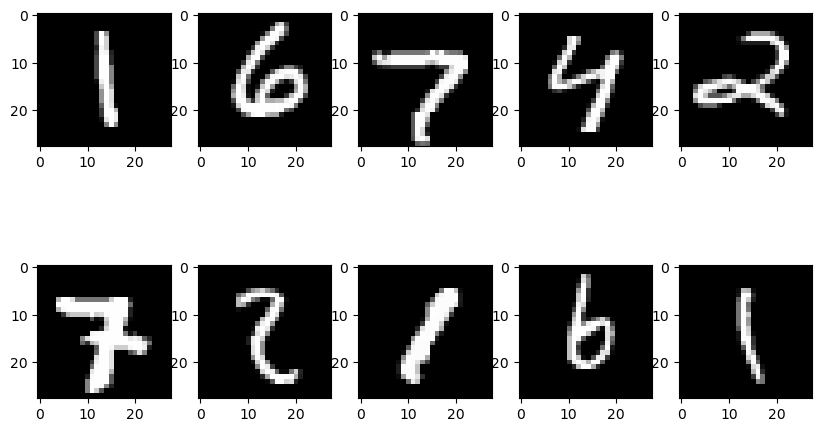

In [9]:
fig,axes = plt.subplots(2,5, figsize = (10,6))
for ax in axes.flat:
    #  Creates a subplot grid with 2 rows and 5 columns, and 
    #  i+1 specifies the position of the current subplot.
    ax.imshow(reshaped_pixel_arr[rnd.randint(0,42000)],cmap = plt.get_cmap('gray'))
plt.show()

Visualizing Distribution

<Axes: xlabel='label', ylabel='count'>

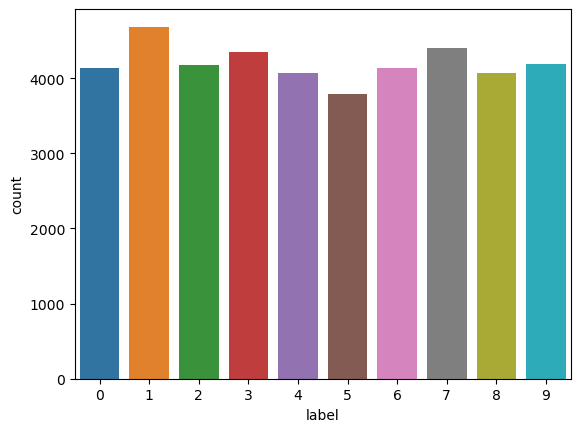

In [10]:
sns.countplot(x = X['label'])

<Axes: xlabel='label', ylabel='Density'>

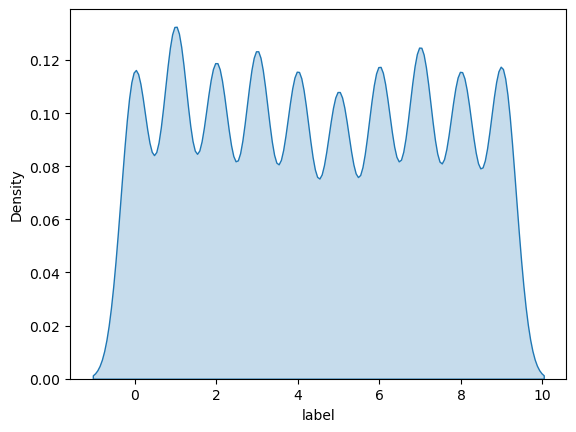

In [11]:
sns.kdeplot(x = X['label'],fill = True)

### Training Model

In [12]:
Y = X['label']
X.drop(columns=['label'],inplace = True)

In [13]:
Y.describe()

count    42000.000000
mean         4.456643
std          2.887730
min          0.000000
25%          2.000000
50%          4.000000
75%          7.000000
max          9.000000
Name: label, dtype: float64

#### Normalization

In [14]:
scaler = Normalizer()
X = scaler.fit_transform(X)
X.max(),X.min()

(0.27392289463802594, 0.0)

In [15]:
X.shape

(42000, 784)

#### Dimensionality Reduction

In [16]:
pca = PCA(0.98) # Retain 98% of useful features
X = pca.fit_transform(X)
X.shape,pca.n_components_

((42000, 263), 263)

Note that the dimension got reduced...

In [17]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=14)
x_train.shape,y_test.shape

((33600, 263), (8400,))

In [18]:
# Returns no. of columns in a single row...
x_train[:1].shape

(1, 263)

In [19]:
# Returns 5 categories
y_train[:5]

16757    9
23209    8
33689    0
18217    0
25808    3
Name: label, dtype: int64

#### Train, Test data balance

Text(0.5, 1.0, 'Test data balance')

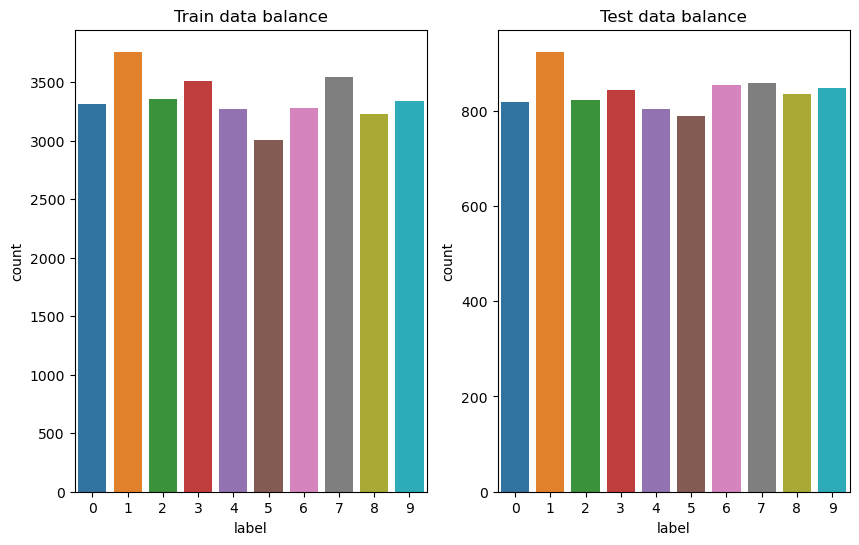

In [20]:
fig, axes = plt.subplots(1,2,figsize = (10,6))
#Train_data
sns.countplot(x = y_train,ax = axes[0])
axes[0].set_title('Train data balance')
#Test_data
sns.countplot(x = y_test, ax = axes[1])
axes[1].set_title('Test data balance')

#### Model Definition

- We'll be using Softmax regression for this problem

<img src = "F:/ML/Personal Projects/Hand written Digit classification/History.png" width="500" height="500">

In [21]:
model = Sequential([
    Dense(128,activation = 'relu')    ,
    Dense(64,activation = 'relu'),
    Dense(10,activation = 'linear')    
])
model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics = ['Accuracy']
)
history = model.fit(
    x_train,y_train,
    epochs = 5,
    # This epoch number is selected based on the performance of model 
    # considering the validation loss..
    validation_split=0.2
)


Epoch 1/5


840/840 [==============================] - 4s 3ms/step - loss: 0.5768 - Accuracy: 0.8515 - val_loss: 0.2738 - val_Accuracy: 0.9213
Epoch 2/5
840/840 [==============================] - 2s 3ms/step - loss: 0.2272 - Accuracy: 0.9337 - val_loss: 0.2162 - val_Accuracy: 0.9354
Epoch 3/5
840/840 [==============================] - 2s 3ms/step - loss: 0.1678 - Accuracy: 0.9515 - val_loss: 0.1836 - val_Accuracy: 0.9461
Epoch 4/5
840/840 [==============================] - 2s 3ms/step - loss: 0.1281 - Accuracy: 0.9622 - val_loss: 0.1568 - val_Accuracy: 0.9531
Epoch 5/5
840/840 [==============================] - 2s 3ms/step - loss: 0.0986 - Accuracy: 0.9715 - val_loss: 0.1450 - val_Accuracy: 0.9568


<img src = "F:/ML/Personal Projects/Hand written Digit classification/Validation_Data_Set.png" width="500" height="500">

<img src = "F:/ML/Personal Projects/Hand written Digit classification/Validation_set_purpose.png" width="500" height="500">

#### Model Evaluation

Loss Evaluation

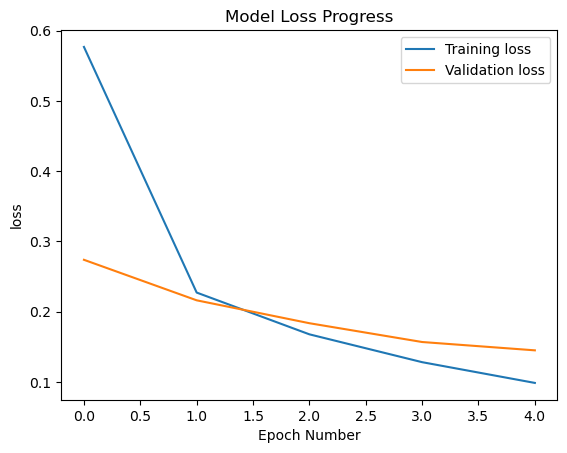

In [22]:
plt.plot(history.history['loss'])
# Consider using validation split to help your model generalize...
plt.plot(history.history['val_loss'])
plt.title('Model Loss Progress')
plt.xlabel('Epoch Number')
plt.ylabel('loss')
plt.legend(['Training loss','Validation loss'])

#### Prediction

In [31]:
# This complex syntax is followed to get rid of numerical round off errors
y_pred = tf.nn.softmax(model.predict(x_test)).numpy()
loss, accuracy = model.evaluate(x_test,y_test,verbose = 1)
print(f'Accuracy: {accuracy * 100 : .2f}%, Loss: {loss: .4f}')

263/263 [==============================] - 0s 2ms/step - loss: 0.1534 - Accuracy: 0.9529
Accuracy:  95.29%, Loss:  0.1534


Numerical round off errors: https://youtu.be/2gIxbTn7GSc?si=MXsVQJgdg9Dk2tQb

In [24]:
# This is an array of probability for class 0,1,.......9
y_pred[0]

array([2.31322010e-05, 2.48021684e-06, 4.36244358e-04, 9.50490939e-05,
       5.41888885e-02, 1.64096000e-05, 8.00319867e-06, 1.51051721e-03,
       1.15758776e-04, 9.43603516e-01], dtype=float32)

#### Measures

In [25]:
# This will return the index of the element that is with the highest probability...
y_pred_label = np.argmax(y_pred,axis = 1)
y_pred_label[:5]

array([9, 5, 2, 9, 0], dtype=int64)

In [26]:
confusion_matrix = tf.math.confusion_matrix(y_test,y_pred_label)

<Axes: >

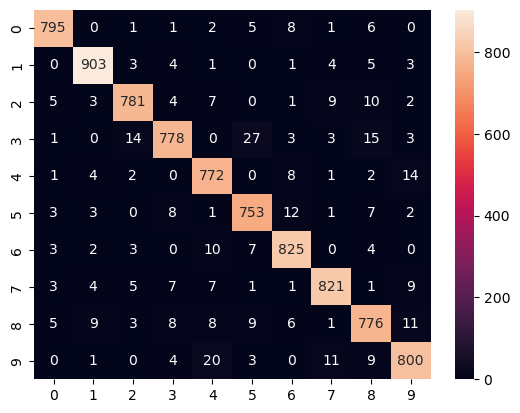

In [27]:
sns.heatmap(
    confusion_matrix,
    annot = True,
    fmt = 'd',
)

Performance

In [28]:
print(classification_report(y_test,y_pred_label))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       819
           1       0.97      0.98      0.97       924
           2       0.96      0.95      0.96       822
           3       0.96      0.92      0.94       844
           4       0.93      0.96      0.95       804
           5       0.94      0.95      0.94       790
           6       0.95      0.97      0.96       854
           7       0.96      0.96      0.96       859
           8       0.93      0.93      0.93       836
           9       0.95      0.94      0.95       848

    accuracy                           0.95      8400
   macro avg       0.95      0.95      0.95      8400
weighted avg       0.95      0.95      0.95      8400



CNN model seem to be providing better results than multiclass softmax 
- Notebook: https://www.kaggle.com/code/tanyamak/digitrecognition/notebook
- Data Set: https://www.kaggle.com/code/tanyamak/digitrecognition/input?select=train.csv